# Info
Name: Nik Faiz Afiq bin Nik Ab Rahman<br>
Student ID: 17217542<br>
Course: WQD7006 Machine Learnig, Universiti Malaya

# Objective
1. Predict the coronavirus trend
2. Listing the country that have worried trend( upward trend) and also countries that are doing well

# Preprocessing to do list
1. Merge all the data from the 3 table
2. Unpivot the table so all the date and data is in 1 column
3. Change the date format
4. Fill the NaN value with 0 or remove it


# Exploratory Analysis
1. Add cummulative cases, cummulative recovered and cummulative death
2. Some analysis might need to be done to achieve objective 2 - list the country that have upward trend and have downward trend
    - Some idea: https://stackoverflow.com/questions/24134894/identify-graph-uptrend-or-downtrend
    - Other idea: find gradient of last 7 days and see if it is positive or negative


# Modeling
1. Use the model to predict the number of new cases (X- date, Y-number of new cases)

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os


# Initial data import

In [210]:
root_folder = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"

confirmed_df = pd.read_csv(root_folder+"time_series_covid19_confirmed_global.csv")
death_df = pd.read_csv(root_folder+"time_series_covid19_deaths_global.csv")
recovered_df = pd.read_csv(root_folder+"time_series_covid19_recovered_global.csv")



In [211]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,50433,50655,50810,50886,51039,51280,51350,51405,51526,51526
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,54317,54827,55380,55755,56254,56572,57146,57727,58316,58316
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,96549,97007,97441,97857,98249,98631,98988,99311,99610,99897
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,7669,7699,7756,7806,7821,7875,7919,7983,8049,8117
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,16931,17029,17099,17149,17240,17296,17371,17433,17553,17568


In [212]:
death_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2117,2126,2139,2149,2160,2174,2179,2181,2191,2191
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,1117,1125,1134,1143,1153,1164,1170,1174,1181,1181
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2696,2705,2716,2722,2728,2737,2745,2751,2756,2762
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,82,83,83,83,83,83,84,84,84,84
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,393,393,396,399,399,403,403,405,405,405


In [213]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,39692,40359,40444,40784,41096,41441,41543,41612,41727,41727
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,29799,30276,30790,31181,31565,32122,32700,33185,33634,33634
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,64401,64777,65144,65505,65862,66214,66550,66855,67127,67395
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,7106,7171,7203,7252,7288,7318,7360,7384,7432,7463
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,9729,9729,9921,9976,10354,10354,10627,10859,11044,11146


# Preprocessing

1. Unpivot and merge all 3 data

In [214]:
confirmed_melt = pd.melt(confirmed_df, id_vars = ['Province/State', 'Country/Region','Lat','Long'],
                         value_vars = confirmed_df.columns[4:],
                         var_name = "Date",value_name = 'Confirmed')
death_melt = pd.melt(death_df, id_vars = ['Province/State', 'Country/Region','Lat','Long'],
                         value_vars = death_df.columns[4:],
                         var_name = "Date",value_name = 'Death')
recovered_melt = pd.melt(recovered_df, id_vars = ['Province/State', 'Country/Region','Lat','Long'],
                         value_vars = recovered_df.columns[4:],
                         var_name = "Date",value_name = 'Recovered')

confirmed_melt.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


2. Merging

In [215]:
merged1 = pd.merge(left = confirmed_melt ,right  = death_melt,how= "outer",
                  on = ['Province/State', 'Country/Region','Date','Lat','Long'])
merged_df = pd.merge(left = merged1 ,right  = recovered_melt,how= "outer",
                  on = ['Province/State', 'Country/Region','Date','Lat','Long'])
print(merged_df.shape)
merged_df.head()

(95842, 8)


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Death,Recovered
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0.0,0.0,0.0
1,NaN,Albania,41.15330,20.168300,1/22/20,0.0,0.0,0.0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0.0,0.0,0.0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0.0,0.0,0.0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0.0,0.0,0.0


3. handling missing data

In [216]:
# percentage of missing data
merged_df.isnull().sum()/merged_df.shape[0]

Province/State    0.693141
Country/Region    0.000000
Lat               0.003610
Long              0.003610
Date              0.000000
Confirmed         0.021661
Death             0.021661
Recovered         0.075812
dtype: float64

In [217]:
# missing value of recovered with 0
merged_df['Recovered'] = merged_df['Recovered'].fillna(0)  

# change the values to integer
merged_df['Recovered'] = merged_df['Recovered'].astype('int') 

# missing value of province/state with ' '
merged_df['Province/State'] = merged_df['Recovered'].fillna(' ')

# Add active column
merged_df['Active'] = merged_df['Confirmed']-merged_df['Death'] - merged_df['Recovered'] 

In [218]:
merged_df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Death,Recovered,Active
95837,367,China,37.8957,114.9042,1/1/21,NaN,NaN,367,NaN
95838,1270,China,33.8820,113.6140,1/1/21,NaN,NaN,1270,NaN
95839,16680,Mozambique,-18.6657,35.5296,1/1/21,NaN,NaN,16680,NaN
95840,5420,Syria,34.8021,38.9968,1/1/21,NaN,NaN,5420,NaN
95841,32,Timor-Leste,-8.8742,125.7275,1/1/21,NaN,NaN,32,NaN


3. Convert date types

In [219]:
print(merged_df['Date'].describe())

merged_df['Date'] = pd.to_datetime(merged_df['Date']).dt.normalize()

print(merged_df['Date'].describe(datetime_is_numeric=True))
merged_df['Date']

count      95842
unique       346
top       9/1/20
freq         277
Name: Date, dtype: object
count                            95842
mean     2020-07-12 12:00:00.000011008
min                2020-01-22 00:00:00
25%                2020-04-17 00:00:00
50%                2020-07-12 12:00:00
75%                2020-10-07 00:00:00
max                2021-01-01 00:00:00
Name: Date, dtype: object


0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
95837   2021-01-01
95838   2021-01-01
95839   2021-01-01
95840   2021-01-01
95841   2021-01-01
Name: Date, Length: 95842, dtype: datetime64[ns]

4. Save file to csv

In [220]:
merged_df.to_csv('data/covid19_cleaned.csv',index=False)

In [221]:
print(merged_df.shape)
merged_df.head()

(95842, 9)


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Death,Recovered,Active
0,0,Afghanistan,33.93911,67.709953,2020-01-22,0.0,0.0,0,0.0
1,0,Albania,41.15330,20.168300,2020-01-22,0.0,0.0,0,0.0
2,0,Algeria,28.03390,1.659600,2020-01-22,0.0,0.0,0,0.0
3,0,Andorra,42.50630,1.521800,2020-01-22,0.0,0.0,0,0.0
4,0,Angola,-11.20270,17.873900,2020-01-22,0.0,0.0,0,0.0


#### New Cases column

In [222]:
# grouped the data based on the country
new = merged_df.groupby(['Date','Country/Region'])['Confirmed','Death','Recovered','Active'].sum().reset_index()
print(new.shape)
new.head()

(66086, 6)


<ipython-input-222-cbcc3bf0d952>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  new = merged_df.groupby(['Date','Country/Region'])['Confirmed','Death','Recovered','Active'].sum().reset_index()


,Date,Country/Region,Confirmed,Death,Recovered,Active
0,2020-01-22,Afghanistan,0.0,0.0,0,0.0
1,2020-01-22,Albania,0.0,0.0,0,0.0
2,2020-01-22,Algeria,0.0,0.0,0,0.0
3,2020-01-22,Andorra,0.0,0.0,0,0.0
4,2020-01-22,Angola,0.0,0.0,0,0.0


Creating new columns dataframe and merged it

In [223]:
new_col = merged_df.groupby(['Country/Region','Date'])['Confirmed','Death','Recovered'].sum().diff().reset_index()

new_col.columns = ['Country/Region', 'Date', 'New Confirmed', 'New Death', 'New Recovered']

# fix first row of the countries
first_rows = (new_col['Country/Region'] != new_col["Country/Region"].shift(1))
new_col.loc[first_rows,'New Confirmed'] = 0
new_col.loc[first_rows,'New Death'] = 0
new_col.loc[first_rows,'New Recovered'] = 0

print(new.head())
print(new_col.head())


# Merge the new values
df = pd.merge(new,new_col,on=['Country/Region','Date'], how = 'left')
df.head()

        Date Country/Region  Confirmed  Death  Recovered  Active
0 2020-01-22    Afghanistan        0.0    0.0          0     0.0
1 2020-01-22        Albania        0.0    0.0          0     0.0
2 2020-01-22        Algeria        0.0    0.0          0     0.0
3 2020-01-22        Andorra        0.0    0.0          0     0.0
4 2020-01-22         Angola        0.0    0.0          0     0.0
  Country/Region       Date  New Confirmed  New Death  New Recovered
0    Afghanistan 2020-01-22            0.0        0.0            0.0
1    Afghanistan 2020-01-23            0.0        0.0            0.0
2    Afghanistan 2020-01-24            0.0        0.0            0.0
3    Afghanistan 2020-01-25            0.0        0.0            0.0
4    Afghanistan 2020-01-26            0.0        0.0            0.0

<ipython-input-223-2c6ecae3e656>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  new_col = merged_df.groupby(['Country/Region','Date'])['Confirmed','Death','Recovered'].sum().diff().reset_index()


,Date,Country/Region,Confirmed,Death,Recovered,Active,New Confirmed,New Death,New Recovered
0,2020-01-22,Afghanistan,0.0,0.0,0,0.0,0.0,0.0,0.0
1,2020-01-22,Albania,0.0,0.0,0,0.0,0.0,0.0,0.0
2,2020-01-22,Algeria,0.0,0.0,0,0.0,0.0,0.0,0.0
3,2020-01-22,Andorra,0.0,0.0,0,0.0,0.0,0.0,0.0
4,2020-01-22,Angola,0.0,0.0,0,0.0,0.0,0.0,0.0


In [224]:
# Fix datatype for new column
df[ ['New Confirmed', 'New Death', 'New Recovered']] = df[ ['New Confirmed', 'New Death', 'New Recovered']].astype('int')


In [225]:
df

,Date,Country/Region,Confirmed,Death,Recovered,Active,New Confirmed,New Death,New Recovered
0,2020-01-22,Afghanistan,0.0,0.0,0,0.0,0,0,0
1,2020-01-22,Albania,0.0,0.0,0,0.0,0,0,0
2,2020-01-22,Algeria,0.0,0.0,0,0.0,0,0,0
3,2020-01-22,Andorra,0.0,0.0,0,0.0,0,0,0
4,2020-01-22,Angola,0.0,0.0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...
66081,2021-01-01,Vietnam,1474.0,35.0,1325,114.0,9,0,0
66082,2021-01-01,West Bank and Gaza,139223.0,1418.0,118926,18879.0,1219,18,1743
66083,2021-01-01,Yemen,2101.0,610.0,1396,95.0,2,0,2
66084,2021-01-01,Zambia,20997.0,390.0,18773,1834.0,272,2,113


Export data to csv

In [226]:
df.to_csv('data/covid19_df.csv',index=False)

In [227]:
# NA check
df.isnull().sum()

Date              0
Country/Region    0
Confirmed         0
Death             0
Recovered         0
Active            0
New Confirmed     0
New Death         0
New Recovered     0
dtype: int64

## Latest Data

In [228]:
# latest df
latest_df = df[df["Date"] == df["Date"].max()]
latest_df.reset_index(drop= True,inplace=True)
latest_df

,Date,Country/Region,Confirmed,Death,Recovered,Active,New Confirmed,New Death,New Recovered
0,2021-01-01,Afghanistan,51526.0,2191.0,41727,7608.0,0,0,0
1,2021-01-01,Albania,58316.0,1181.0,33634,23501.0,0,0,0
2,2021-01-01,Algeria,99897.0,2762.0,67395,29740.0,287,6,268
3,2021-01-01,Andorra,8117.0,84.0,7463,570.0,68,0,31
4,2021-01-01,Angola,17568.0,405.0,11146,6017.0,15,0,102
...,...,...,...,...,...,...,...,...,...
186,2021-01-01,Vietnam,1474.0,35.0,1325,114.0,9,0,0
187,2021-01-01,West Bank and Gaza,139223.0,1418.0,118926,18879.0,1219,18,1743
188,2021-01-01,Yemen,2101.0,610.0,1396,95.0,2,0,2
189,2021-01-01,Zambia,20997.0,390.0,18773,1834.0,272,2,113


# EDA

Trend for new cases within the last 7 days. Increasing, stays the same, or decreasing

In [229]:
weekly_df = df[df["Date"] > (df["Date"].max()-pd.offsets.Day(7))]
weekly_df.reset_index(drop= True,inplace=True)
weekly_df

,Date,Country/Region,Confirmed,Death,Recovered,Active,New Confirmed,New Death,New Recovered
0,2020-12-26,Afghanistan,50886.0,2149.0,40784,7953.0,76,10,340
1,2020-12-26,Albania,55755.0,1143.0,31181,23431.0,375,9,391
2,2020-12-26,Algeria,97857.0,2722.0,65505,29630.0,416,6,361
3,2020-12-26,Andorra,7806.0,83.0,7252,471.0,50,0,49
4,2020-12-26,Angola,17149.0,399.0,9976,6774.0,50,3,55
...,...,...,...,...,...,...,...,...,...
1332,2021-01-01,Vietnam,1474.0,35.0,1325,114.0,9,0,0
1333,2021-01-01,West Bank and Gaza,139223.0,1418.0,118926,18879.0,1219,18,1743
1334,2021-01-01,Yemen,2101.0,610.0,1396,95.0,2,0,2
1335,2021-01-01,Zambia,20997.0,390.0,18773,1834.0,272,2,113


In [231]:

def gradient_find(x):
    return np.polyfit(range(len(x)), x, 1)[0]

In [232]:


weekly = weekly_df.groupby(['Country/Region'])['New Confirmed'].apply(gradient_find).reset_index()
weekly.rename(columns={"New Confirmed": "gradient"},inplace=True)

weekly['Status'] = ["increasing" if x>0.2  else "decreasing" if x<-0.2 else "around the same" for x in weekly ['gradient'] ]
weekly

,Country/Region,gradient,Status
0,Afghanistan,-17.071429,decreasing
1,Albania,-24.357143,decreasing
2,Algeria,-22.571429,decreasing
3,Andorra,5.928571,increasing
4,Angola,-1.464286,decreasing
...,...,...,...
186,Vietnam,1.142857,increasing
187,West Bank and Gaza,-1.535714,decreasing
188,Yemen,0.178571,around the same
189,Zambia,31.857143,increasing


In [233]:
weekly['Status'].value_counts()

increasing         122
decreasing          44
around the same     25
Name: Status, dtype: int64

<AxesSubplot:>

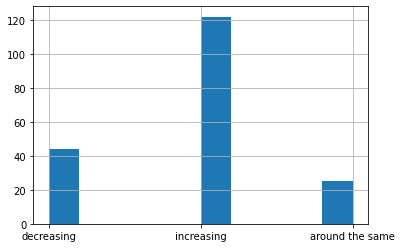

In [234]:
weekly['Status'].hist()

In [257]:
weekly_inc = table1[table1["Status"] == "increasing"].sort_values("gradient",ascending=False)
weekly_inc.head(10)

,Country/Region,gradient,Status
23,Brazil,4777.357143,increasing
181,United Kingdom,3995.035714,increasing
62,France,3379.035714,increasing
46,Czechia,2595.071429,increasing
85,Italy,2575.571429,increasing
137,Poland,1673.821429,increasing
159,South Africa,1527.500000,increasing
114,Mexico,1308.750000,increasing
138,Portugal,1188.107143,increasing
161,Spain,1012.428571,increasing


In [256]:
weekly_same = table1[table1["Status"] == "around the same"].sort_values("gradient",ascending=False)
weekly_same.head(10)

,Country/Region,gradient,Status
188,Yemen,1.785714e-01,around the same
24,Brunei,1.785714e-01,around the same
64,Gambia,1.785714e-01,around the same
33,Central African Republic,7.142857e-02,around the same
125,Nicaragua,2.437398e-16,around the same
72,Guinea-Bissau,3.588137e-17,around the same
60,Fiji,1.466281e-17,around the same
113,Mauritius,0.000000e+00,around the same
184,Vanuatu,0.000000e+00,around the same
170,Tanzania,0.000000e+00,around the same


In [258]:
weekly_dec = table1[table1["Status"] == "decreasing"].sort_values("gradient",ascending=True)
weekly_inc.head(10)

,Country/Region,gradient,Status
23,Brazil,4777.357143,increasing
181,United Kingdom,3995.035714,increasing
62,France,3379.035714,increasing
46,Czechia,2595.071429,increasing
85,Italy,2575.571429,increasing
137,Poland,1673.821429,increasing
159,South Africa,1527.500000,increasing
114,Mexico,1308.750000,increasing
138,Portugal,1188.107143,increasing
161,Spain,1012.428571,increasing


coef: 192769.39285714278
gradient: 656.1071428571479


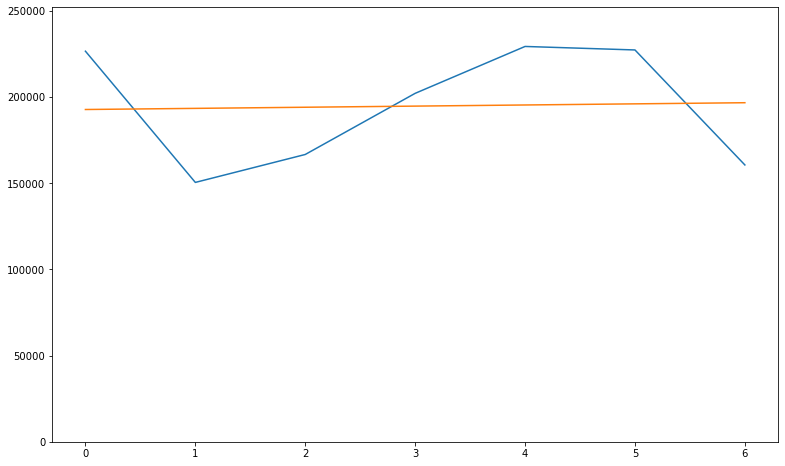

In [252]:
country = 'US'
d = weekly_df[weekly_df['Country/Region'] == country]['New Confirmed']

m, b = np.polyfit(range(len(d)), d, 1)

print("coef:",b)
print("gradient:",m)

fig = plt.figure(figsize=(13,8))
plt.plot(range(len(d)),d)
plt.plot(range(len(d)), m*range(len(d)) + b)
plt.ylim(0, max(d)*1.1) 
plt.show()

## World Data

In [239]:
world_df = df.groupby(['Date']).sum().astype('int').reset_index()
world_df

,Date,Confirmed,Death,Recovered,Active,New Confirmed,New Death,New Recovered
0,2020-01-22,555,17,28,510,0,0,0
1,2020-01-23,654,18,30,606,99,1,2
2,2020-01-24,941,26,36,879,287,8,6
3,2020-01-25,1434,42,39,1353,493,16,3
4,2020-01-26,2118,56,52,2010,684,14,13
...,...,...,...,...,...,...,...,...
341,2020-12-28,81285853,1774390,45994197,34013505,488731,9435,296123
342,2020-12-29,81951541,1789915,46348935,34318991,665688,15525,354738
343,2020-12-30,82708280,1805008,46731540,34685515,756739,15093,382605
344,2020-12-31,83424446,1818116,47010049,35113601,716166,13108,278509


## Statistics

In [240]:
# table for top 10 countries
col = 'Confirmed'
latest_df.sort_values(col,ascending = False).head(10)

,Date,Country/Region,Confirmed,Death,Recovered,Active,New Confirmed,New Death,New Recovered
177,2021-01-01,US,20128693.0,347788.0,0,19780905.0,160606,2051,0
79,2021-01-01,India,10286709.0,148994.0,9883461,254254.0,20035,256,23181
23,2021-01-01,Brazil,7700578.0,195411.0,6855372,649795.0,24605,462,6528
141,2021-01-01,Russia,3153960.0,56798.0,2553467,543695.0,26613,527,25745
62,2021-01-01,France,2697014.0,64892.0,200822,2431300.0,19348,133,680
181,2021-01-01,United Kingdom,2549689.0,74237.0,5679,2469773.0,53458,615,200
176,2021-01-01,Turkey,2220855.0,21093.0,2114760,85002.0,12203,212,14110
85,2021-01-01,Italy,2129376.0,74621.0,1479988,574767.0,22210,462,16877
161,2021-01-01,Spain,1928265.0,50837.0,150376,1727052.0,0,0,0
66,2021-01-01,Germany,1762637.0,34145.0,1388744,339748.0,2117,354,38036


# Visualization


In [241]:
world_df

,Date,Confirmed,Death,Recovered,Active,New Confirmed,New Death,New Recovered
0,2020-01-22,555,17,28,510,0,0,0
1,2020-01-23,654,18,30,606,99,1,2
2,2020-01-24,941,26,36,879,287,8,6
3,2020-01-25,1434,42,39,1353,493,16,3
4,2020-01-26,2118,56,52,2010,684,14,13
...,...,...,...,...,...,...,...,...
341,2020-12-28,81285853,1774390,45994197,34013505,488731,9435,296123
342,2020-12-29,81951541,1789915,46348935,34318991,665688,15525,354738
343,2020-12-30,82708280,1805008,46731540,34685515,756739,15093,382605
344,2020-12-31,83424446,1818116,47010049,35113601,716166,13108,278509


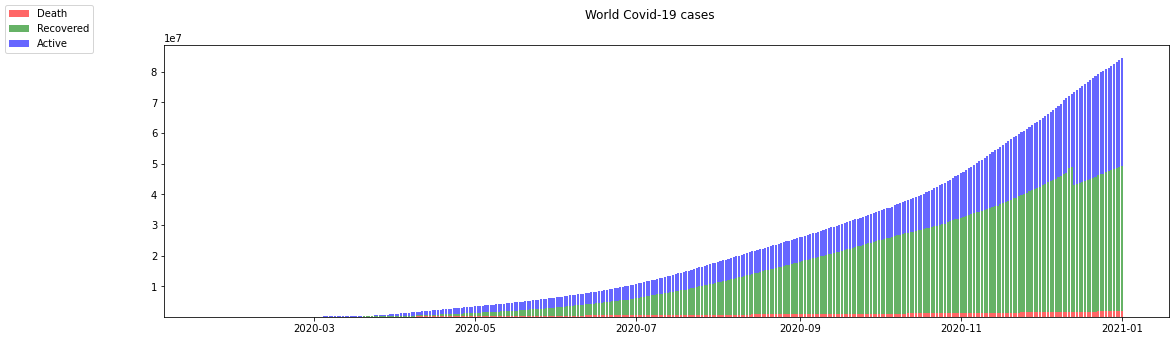

In [242]:
fig = plt.figure(figsize=(18,5))
plt.suptitle('World Covid-19 cases')
# fig, ax = plt.subplots()

plt.bar(world_df['Date'],world_df['Death'].values,color = 'red',alpha=0.6,label='Death')
plt.bar(world_df['Date'],world_df['Recovered'].values,color = 'green',alpha=0.6,label='Recovered',
       bottom = world_df['Death'])
plt.bar(world_df['Date'],world_df['Active'].values,color = 'blue',alpha=0.6,label='Active',
       bottom = world_df['Death']+world_df['Recovered'])


fig.legend(loc='upper left')

In [243]:
#Modeling

In [244]:
# train-split test

X = world_df['Date'].values.reshape(-1, 1)
X = np.array(range(len(world_df['Date']))).reshape(-1,1)


y = world_df['Confirmed']

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42 ,train_size = 0.7)
X

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [245]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)


(242, 1)
(104, 1)
(242,)
(104,)


In [246]:
#Creting X for forecasting 20days into the future
Xforecast = np.array(range(int(max(X)),int(max(X))+20)).reshape(-1,1)

# Initializing score table 
score = pd.DataFrame(columns = ["Model","MAE","RMSE",'R2 Score'])

# Initializing prediction table
pred_list  = pd.DataFrame()
pred_list.insert(0,"date",pd.Series(pd.date_range("2021-01-01", periods=20, freq="D")))

  Model          MAE         RMSE   R2 Score
0   svr  17426916.78  23421545.86 -916393.13


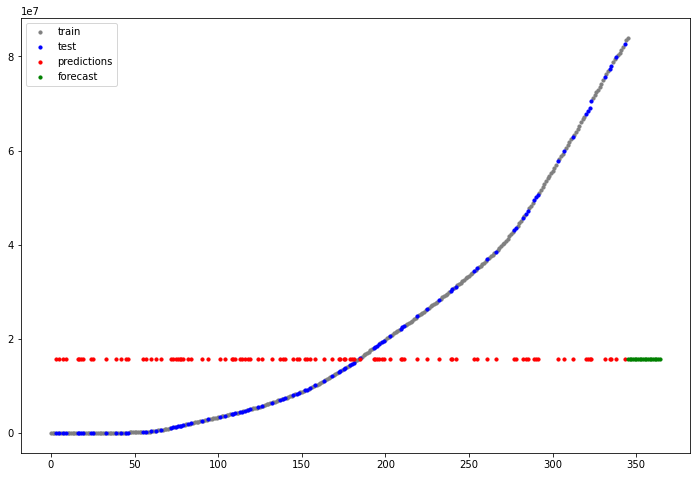

In [247]:
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import confusion_matrix


# svr = SVR(kernel='poly')
svr = SVR(kernel='poly')
svr.fit(Xtrain,ytrain)
ypred = svr.predict(Xtest)
yforecast = svr.predict(Xforecast)

score = score.append({
    "Model":'svr',
    "MAE": round(metrics.mean_absolute_error(ypred,ytest),2),
    "RMSE": round(metrics.mean_squared_error(ytest,ypred,squared=False),2),
    "R2 Score": round(metrics.r2_score(ypred,ytest),2)
},ignore_index = True)

print(score)


pred_list.insert(1,"svr",yforecast)

plt.figure(figsize=(12,8))
plt.plot()
plt.scatter(Xtrain,ytrain,label = 'train',c = 'grey',s=10)
plt.scatter(Xtest,ytest,label = 'test',color ='blue',s=10)
plt.scatter(Xtest,ypred,label = 'predictions',color = 'red',s=10)
plt.scatter(Xforecast,yforecast,label = 'forecast',color = 'green',s=10)
plt.legend()


               Model          MAE         RMSE   R2 Score
0                svr  17426916.78  23421545.86 -916393.13
1  Linear Regression    407553.36    510716.71       1.00


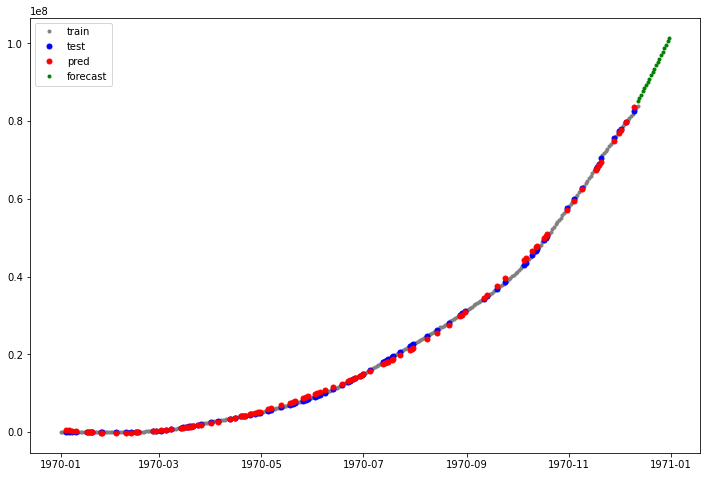

In [248]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=4)

poly_Xtrain = poly_features.fit_transform(Xtrain) 
poly_Xtest = poly_features.fit_transform(Xtest)
poly_Xforecast = poly_features.fit_transform(Xforecast)

lin_reg = LinearRegression()
lin_reg.fit(poly_Xtrain,ytrain)
ypred = lin_reg.predict(poly_Xtest)
yforecast = lin_reg.predict(poly_Xforecast)


score = score.append({
    "Model":'Linear Regression',
    "MAE": round(metrics.mean_absolute_error(ypred,ytest),2),
    "RMSE": round(metrics.mean_squared_error(ytest,ypred,squared=False),2),
    "R2 Score": round(metrics.r2_score(ypred,ytest),2)
},ignore_index = True)

print(score)
pred_list.insert(2,"Linear Regression",yforecast)

plt.figure(figsize=(12,8))
plt.plot()
plt.plot_date(Xtrain,ytrain,label = 'train',c = 'grey',markersize=3)
plt.plot_date(Xtest,ytest,label = 'test',color ='blue',markersize=5)
plt.plot_date(Xtest,ypred,label = 'pred',color = 'red',markersize=5)
plt.plot_date(Xforecast,yforecast,label = 'forecast',color = 'green',markersize=3)
plt.legend()


                     Model          MAE         RMSE   R2 Score
0                      svr  17426916.78  23421545.86 -916393.13
1        Linear Regression    407553.36    510716.71       1.00
2  Random Forest Regressor    156721.49    267909.53       1.00


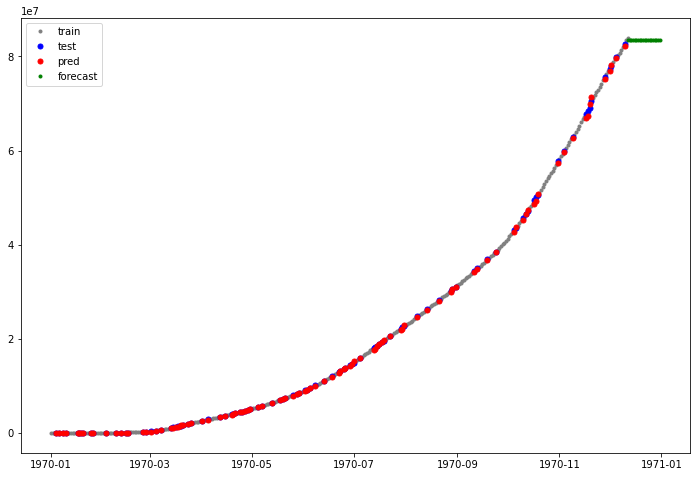

In [249]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(Xtrain,ytrain)
ypred = rf_reg.predict(Xtest)
yforecast = rf_reg.predict(Xforecast)


score = score.append({
    "Model":'Random Forest Regressor',
    "MAE": round(metrics.mean_absolute_error(ypred,ytest),2),
    "RMSE": round(metrics.mean_squared_error(ytest,ypred,squared=False),2),
    "R2 Score": round(metrics.r2_score(ypred,ytest),2)
},ignore_index = True)

print(score)
pred_list.insert(3,"Random Forest Regressor",yforecast)

plt.figure(figsize=(12,8))
plt.plot()
plt.plot_date(Xtrain,ytrain,label = 'train',c = 'grey',markersize=3)
plt.plot_date(Xtest,ytest,label = 'test',color ='blue',markersize=5)
plt.plot_date(Xtest,ypred,label = 'pred',color = 'red',markersize=5)
plt.plot_date(Xforecast,yforecast,label = 'forecast',color = 'green',markersize=3)
plt.legend()

In [250]:
pred_list

,date,svr,Linear Regression,Random Forest Regressor
0,2021-01-01,1.572066e+07,8.525985e+07,83501829.01
1,2021-01-02,1.572144e+07,8.605230e+07,83501829.01
2,2021-01-03,1.572221e+07,8.685123e+07,83501829.01
3,2021-01-04,1.572300e+07,8.765669e+07,83501829.01
4,2021-01-05,1.572378e+07,8.846871e+07,83501829.01
5,2021-01-06,1.572458e+07,8.928736e+07,83501829.01
6,2021-01-07,1.572537e+07,9.011267e+07,83501829.01
7,2021-01-08,1.572617e+07,9.094470e+07,83501829.01
8,2021-01-09,1.572698e+07,9.178347e+07,83501829.01
9,2021-01-10,1.572779e+07,9.262906e+07,83501829.01
